# * Beginner Level Task 2 *
Stock Market Prediction And Forecasting Using Stacked LSTM

Tutorial: https://www.youtube.com/watch?v=H6du_pfuznE

In [1]:
# IMPORTING LIBRARIES

import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

Loading Stock Market Prediction data 

In [2]:
dataset =pd.read_csv('Stock.csv')
dataset.head(10)

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55
5,2018-09-21,235.00,237.00,227.95,233.75,234.60,5395319,12589.59
6,2018-09-19,235.95,237.20,233.45,234.60,234.90,1362058,3202.78
7,2018-09-18,237.90,239.25,233.50,235.50,235.05,2614794,6163.70
8,2018-09-17,233.15,238.00,230.25,236.40,236.60,3170894,7445.41
9,2018-09-14,223.45,236.70,223.30,234.00,233.95,6377909,14784.50


# Summarize the Dataset

In [3]:
dataset.shape

(2035, 8)

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2035 entries, 0 to 2034
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  2035 non-null   object 
 1   Open                  2035 non-null   float64
 2   High                  2035 non-null   float64
 3   Low                   2035 non-null   float64
 4   Last                  2035 non-null   float64
 5   Close                 2035 non-null   float64
 6   Total Trade Quantity  2035 non-null   int64  
 7   Turnover (Lacs)       2035 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 127.3+ KB


In [5]:
dataset.describe()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
count,2035.000000,2035.000000,2035.000000,2035.000000,2035.00000,2.035000e+03,2035.000000
mean,149.713735,151.992826,147.293931,149.474251,149.45027,2.335681e+06,3899.980565
std,48.664509,49.413109,47.931958,48.732570,48.71204,2.091778e+06,4570.767877
min,81.100000,82.800000,80.000000,81.000000,80.95000,3.961000e+04,37.040000
25%,120.025000,122.100000,118.300000,120.075000,120.05000,1.146444e+06,1427.460000
50%,141.500000,143.400000,139.600000,141.100000,141.25000,1.783456e+06,2512.030000
75%,157.175000,159.400000,155.150000,156.925000,156.90000,2.813594e+06,4539.015000
max,327.700000,328.750000,321.650000,325.950000,325.75000,2.919102e+07,55755.080000


In [6]:
dataset.tail()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
2030,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98
2031,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
2032,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
2033,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2034,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56


In [7]:
df1=dataset.reset_index()['High']

In [8]:
df1.shape

(2035,)

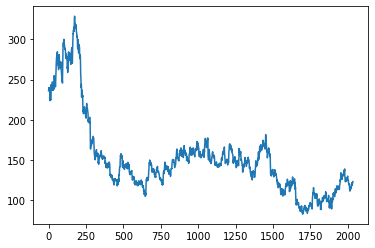

In [9]:
plt.plot(df1)

LSTM are sensitive to the scale of the data. so we apply MinMax scaler

In [10]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
df1 = scaler.fit_transform(np.array(df1).reshape(-1,1)) 

In [11]:
df1

array([[0.62268754],
       [0.62614353],
       [0.6391543 ],
       ...,
       [0.15917869],
       [0.15938199],
       [0.16344786]])

In [12]:
df1.shape

(2035, 1)

# Train and Test Split

In [39]:
train_size = int (len(df1)*0.6)   # taking 80 % data as training data
test_size = len(df1)-train_size     # rest 20 % as testing data

train_data = df1[0:train_size,:]
test_data = df1[train_size:len(df1),:1]

In [40]:
train_size, test_size

(1221, 814)

In [41]:
train_data

array([[0.62268754],
       [0.62614353],
       [0.6391543 ],
       ...,
       [0.33990649],
       [0.32445619],
       [0.32526936]])

In [42]:
test_data

array([[0.33563732],
       [0.33421427],
       [0.32567595],
       [0.31469811],
       [0.31978044],
       [0.32791218],
       [0.31713763],
       [0.30656638],
       [0.30494003],
       [0.30067087],
       [0.29802805],
       [0.29680829],
       [0.27546249],
       [0.25716609],
       [0.27281968],
       [0.26265501],
       [0.25960561],
       [0.25879244],
       [0.27038016],
       [0.28013824],
       [0.28074812],
       [0.2691604 ],
       [0.27342956],
       [0.28887985],
       [0.28542387],
       [0.28623704],
       [0.281358  ],
       [0.26997357],
       [0.27281968],
       [0.26509453],
       [0.25431998],
       [0.2537101 ],
       [0.25045741],
       [0.23521041],
       [0.23419394],
       [0.2386664 ],
       [0.25818256],
       [0.2630616 ],
       [0.26834723],
       [0.25919902],
       [0.25960561],
       [0.24395202],
       [0.24598496],
       [0.26631429],
       [0.27078675],
       [0.26834723],
       [0.2691604 ],
       [0.262

In [43]:
train_data.shape, test_data.shape

((1221, 1), (814, 1))

# Timesteps

In [44]:
#convert an array of values into a dataset matrix
def create_data(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = (dataset[i:(i+time_step), 0])
        dataX.append(a)
        b = (dataset[i + time_step, 0])
        dataY.append(b)
    return np.array(dataX), np.array(dataY)

In [45]:
#reshape into X=t,t+1,t+2,t+3 and y=t+4

time_step = 300

X_train, Y_train = create_data(train_data, time_step)
X_test, Y_test = create_data(test_data, time_step)

In [46]:
X_train,X_test

(array([[0.62268754, 0.62614353, 0.6391543 , ..., 0.38463102, 0.38991665,
         0.39235617],
        [0.62614353, 0.6391543 , 0.62594023, ..., 0.38991665, 0.39235617,
         0.37853222],
        [0.6391543 , 0.62594023, 0.63590161, ..., 0.39235617, 0.37853222,
         0.38178492],
        ...,
        [0.30412686, 0.30168733, 0.30534662, ..., 0.33828014, 0.33096158,
         0.33929661],
        [0.30168733, 0.30534662, 0.30859931, ..., 0.33096158, 0.33929661,
         0.34803822],
        [0.30534662, 0.30859931, 0.30453344, ..., 0.33929661, 0.34803822,
         0.33990649]]),
 array([[0.33563732, 0.33421427, 0.32567595, ..., 0.2018703 , 0.1955682 ,
         0.20227689],
        [0.33421427, 0.32567595, 0.31469811, ..., 0.1955682 , 0.20227689,
         0.20105713],
        [0.32567595, 0.31469811, 0.31978044, ..., 0.20227689, 0.20105713,
         0.1955682 ],
        ...,
        [0.00833503, 0.01097784, 0.01707664, ..., 0.15816223, 0.15328319,
         0.14921732],
        [0.0

In [47]:
Y_train,Y_test

(array([0.37853222, 0.38178492, 0.37405977, 0.36592803, 0.34580199,
        0.30941248, 0.30494003, 0.30209392, 0.29009961, 0.29619841,
        0.28013824, 0.28013824, 0.27403944, 0.28115471, 0.2935556 ,
        0.30819272, 0.31144542, 0.30839602, 0.3120553 , 0.3212035 ,
        0.32506607, 0.31571458, 0.30453344, 0.29152267, 0.29619841,
        0.30128075, 0.29924781, 0.29619841, 0.2996544 , 0.30717626,
        0.28948973, 0.27729213, 0.25777597, 0.2630616 , 0.26204513,
        0.25147388, 0.25736938, 0.26672088, 0.27790201, 0.28867656,
        0.28379752, 0.29213255, 0.29538524, 0.2935556 , 0.29253913,
        0.29843464, 0.29904452, 0.29416548, 0.29009961, 0.2996544 ,
        0.30697296, 0.30920919, 0.31978044, 0.29233584, 0.29518195,
        0.30006099, 0.28603375, 0.28644033, 0.28908315, 0.28786339,
        0.27647896, 0.28339093, 0.27729213, 0.28542387, 0.28928644,
        0.28847327, 0.28237447, 0.29131937, 0.29091279, 0.29274243,
        0.2874568 , 0.28176459, 0.2844074 , 0.28

In [48]:
X_test.shape,X_train.shape

((513, 300), (920, 300))

In [49]:
Y_test.shape, Y_train.shape

((513,), (920,))

In [50]:
#reshape input to be [sample, time steps, features] which is required for LSTM

X_train = X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1],1)

In [25]:
pip install keras

Note: you may need to restart the kernel to use updated packages.


In [26]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [61]:
# Create the Stacked LSTM model
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [62]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [63]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 100, 50)           10400     
                                                                 
 lstm_7 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_8 (LSTM)               (None, 50)                20200     
                                                                 
 dense_2 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [72]:
model.fit(X_train,Y_train,validation_data=(X_test,Y_test),epochs=100,batch_size=64,verbose=1)


Epoch 1/100
12/12 [==============================] - 6s 487ms/step - loss: 0.0206 - val_loss: 0.0505
Epoch 2/100
12/12 [==============================] - 4s 309ms/step - loss: 0.0035 - val_loss: 0.0046
Epoch 3/100
12/12 [==============================] - 4s 300ms/step - loss: 0.0014 - val_loss: 0.0040
Epoch 4/100
12/12 [==============================] - 3s 287ms/step - loss: 8.1361e-04 - val_loss: 0.0073
Epoch 5/100
12/12 [==============================] - 3s 290ms/step - loss: 6.6860e-04 - val_loss: 0.0062
Epoch 6/100
12/12 [==============================] - 3s 255ms/step - loss: 6.4653e-04 - val_loss: 0.0062
Epoch 7/100
12/12 [==============================] - 3s 291ms/step - loss: 6.6186e-04 - val_loss: 0.0062
Epoch 8/100
12/12 [==============================] - 4s 300ms/step - loss: 6.2498e-04 - val_loss: 0.0049
Epoch 9/100
12/12 [==============================] - 4s 297ms/step - loss: 6.2745e-04 - val_loss: 0.0042
Epoch 10/100
12/12 [==============================] - 4s 303ms/step

12/12 [==============================] - 3s 282ms/step - loss: 1.7841e-04 - val_loss: 0.0014
Epoch 79/100
12/12 [==============================] - 3s 260ms/step - loss: 1.9611e-04 - val_loss: 0.0013
Epoch 80/100
12/12 [==============================] - 3s 281ms/step - loss: 2.0224e-04 - val_loss: 0.0012
Epoch 81/100
12/12 [==============================] - 3s 290ms/step - loss: 2.1049e-04 - val_loss: 0.0020
Epoch 82/100
12/12 [==============================] - 3s 288ms/step - loss: 1.9466e-04 - val_loss: 0.0010
Epoch 83/100
12/12 [==============================] - 3s 284ms/step - loss: 1.5801e-04 - val_loss: 0.0010
Epoch 84/100
12/12 [==============================] - 3s 272ms/step - loss: 1.6260e-04 - val_loss: 9.4397e-04
Epoch 85/100
12/12 [==============================] - 3s 249ms/step - loss: 1.5695e-04 - val_loss: 0.0013
Epoch 86/100
12/12 [==============================] - 3s 242ms/step - loss: 2.0192e-04 - val_loss: 9.7445e-04
Epoch 87/100
12/12 [==============================]

# Predictions

In [76]:
#prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

ValueError: in user code:

    File "C:\Users\7024d\anaconda3\lib\site-packages\keras\engine\training.py", line 1801, in predict_function  *
        return step_function(self, iterator)
    File "C:\Users\7024d\anaconda3\lib\site-packages\keras\engine\training.py", line 1790, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\7024d\anaconda3\lib\site-packages\keras\engine\training.py", line 1783, in run_step  **
        outputs = model.predict_step(data)
    File "C:\Users\7024d\anaconda3\lib\site-packages\keras\engine\training.py", line 1751, in predict_step
        return self(x, training=False)
    File "C:\Users\7024d\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 67, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\Users\7024d\anaconda3\lib\site-packages\keras\engine\input_spec.py", line 264, in assert_input_compatibility
        raise ValueError(f'Input {input_index} of layer "{layer_name}" is '

    ValueError: Input 0 of layer "sequential_2" is incompatible with the layer: expected shape=(None, 100, 1), found shape=(None, 300, 1)


In [77]:
#Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

NameError: name 'train_predict' is not defined

In [79]:
# Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(Y_train,train_predict))

NameError: name 'train_predict' is not defined

In [80]:
# Test Data RMSE
math.sqrt(mean_squared_error(Y_test,test_predict))

NameError: name 'test_predict' is not defined

In [81]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

NameError: name 'numpy' is not defined

In [82]:
len(test_data)

814

In [83]:
x_input=test_data[341:].reshape(1,-1)
x_input.shape

(1, 473)

In [84]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [85]:
temp_input

[0.11038829030290709,
 0.10611912990445216,
 0.10124008944907503,
 0.0902622484244765,
 0.10774547672291113,
 0.10774547672291113,
 0.11242122382598091,
 0.12360235820288679,
 0.11811343769058746,
 0.10855865013214067,
 0.11547062411059156,
 0.10977841024598495,
 0.10428948973368574,
 0.102866436267534,
 0.09819068916446433,
 0.11140475706444397,
 0.1059158365521447,
 0.09575116893677571,
 0.10713559666598904,
 0.11973978450904654,
 0.12380565155519413,
 0.1284813986582639,
 0.1396625330351698,
 0.14230534661516564,
 0.14596462695669854,
 0.15328318763976417,
 0.1540963610489937,
 0.14698109371823542,
 0.1378328928644033,
 0.14189875991055095,
 0.14169546655824355,
 0.14881073388900184,
 0.1486074405366944,
 0.16629396218743647,
 0.17564545639357593,
 0.1705631225858914,
 0.15490953445822325,
 0.15043708070746087,
 0.1479975604797723,
 0.161211628379752,
 0.1606017483228298,
 0.15531612116283794,
 0.145151453547469,
 0.14616792030900588,
 0.1520634275259199,
 0.1522667208782273,
 0.134

In [86]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

0 day input [0.10611913 0.10124009 0.09026225 0.10774548 0.10774548 0.11242122
 0.12360236 0.11811344 0.10855865 0.11547062 0.10977841 0.10428949
 0.10286644 0.09819069 0.11140476 0.10591584 0.09575117 0.1071356
 0.11973978 0.12380565 0.1284814  0.13966253 0.14230535 0.14596463
 0.15328319 0.15409636 0.14698109 0.13783289 0.14189876 0.14169547
 0.14881073 0.14860744 0.16629396 0.17564546 0.17056312 0.15490953
 0.15043708 0.14799756 0.16121163 0.16060175 0.15531612 0.14515145
 0.14616792 0.15206343 0.15226672 0.13498679 0.1223826  0.11282781
 0.11852002 0.11709697 0.12482212 0.13092092 0.16751372 0.13417361
 0.12644847 0.13173409 0.1376296  0.155926   0.16466762 0.15043708
 0.15125025 0.14657451 0.14210205 0.15125025 0.15145355 0.15734905
 0.16873348 0.1774751  0.18702988 0.16039845 0.15206343 0.1589754
 0.16263468 0.15978857 0.16324456 0.16283798 0.16588738 0.16182151
 0.16263468 0.1652775  0.17056312 0.1772718  0.14718439 0.14108559
 0.16060175 0.15328319 0.12421224 0.13498679 0.10591

ValueError: cannot reshape array of size 472 into shape (1,100,1)

In [87]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [88]:
len(df1)

2035

ValueError: x and y must have same first dimension, but have shapes (100,) and (877, 1)

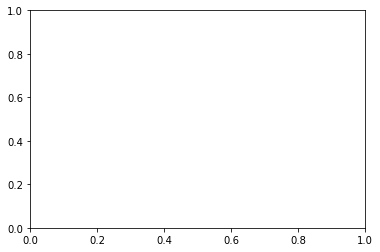

In [89]:
plt.plot(day_new,scaler.inverse_transform(df1[1158:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

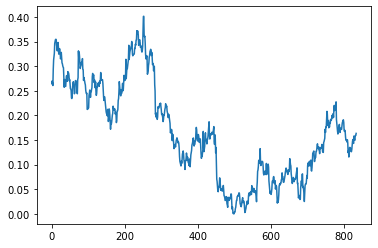

In [90]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

In [91]:
df3=scaler.inverse_transform(df3).tolist()

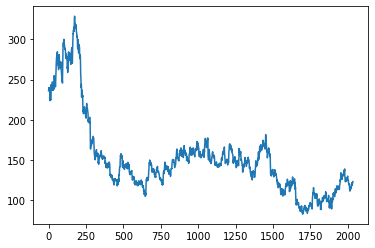

In [92]:
plt.plot(df3)